# Sensors, Perception and Actuation
## Assignment - 2

### Github Link:

Student : Jameel Ahmed Syed
email : j.syed@innopolis.university

### Task 1
To Create simplified recursive filter and compare its results with 1D Kalman filter
- Generate noisy 1D data,
- Demonstrate 1D Linear Kalman Filter estimation on data,
- Create simplified recursive filter and compare its results with 1D Kalman filter
- Play with different values for filter initialization (xOpt and eOpt) to prove the Filter convergence


### Task 2
Kalman Filter - Estimation of the traveled distance
- To predict the traveled distance based on the linear accelerometer measurement.
Update the predicted value using the distance measurements of the GPS sensor.
- Apply Kalman filter to predict the traveled distance and plot the graphs of the measured distance
(in meters) and the predicted distance (in meters)
```

### 1. Import All the Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from geopy import distance

# Task 1 : Simplified Recursive filter and 1D Kalman filter

### a) Generate noisy 1D data

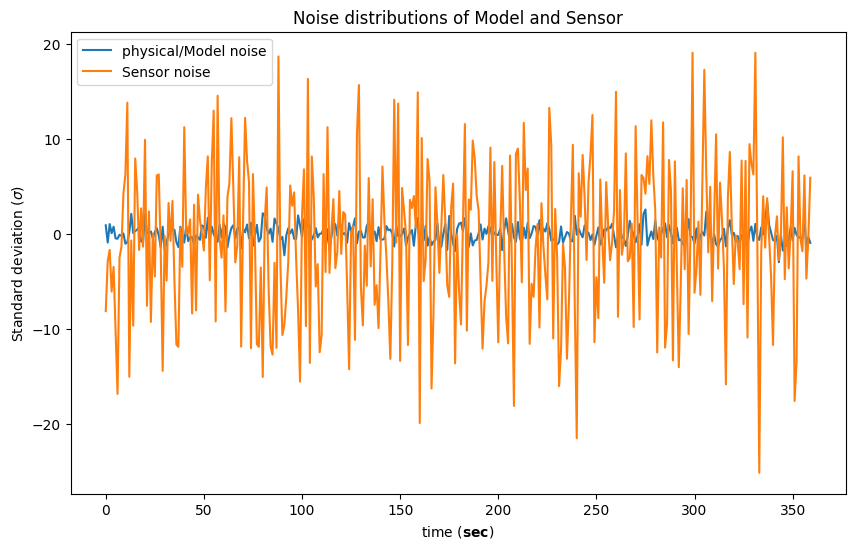

In [2]:
N = 360
t = np.arange(0, N, 1)
meu_eta, sigma_eta = 0, 1
meu_neta, sigma_neta = 0, 8

d1 = np.random.normal(meu_eta, sigma_eta, N)
d2 = np.random.normal(meu_neta, sigma_neta, N)

plt.figure(figsize=(10, 6))
plt.title("Noise distributions of Model and Sensor")
plt.xlabel("time $(\mathbf{sec})$")
plt.ylabel("Standard deviation $(\sigma)$")
plt.plot(t, d1, label="physical/Model noise")
plt.plot(t, d2, label="Sensor noise")
plt.legend()
plt.show()



In [3]:
a = np.linspace(0, N, 100)

### b) Create simplified recursive filter

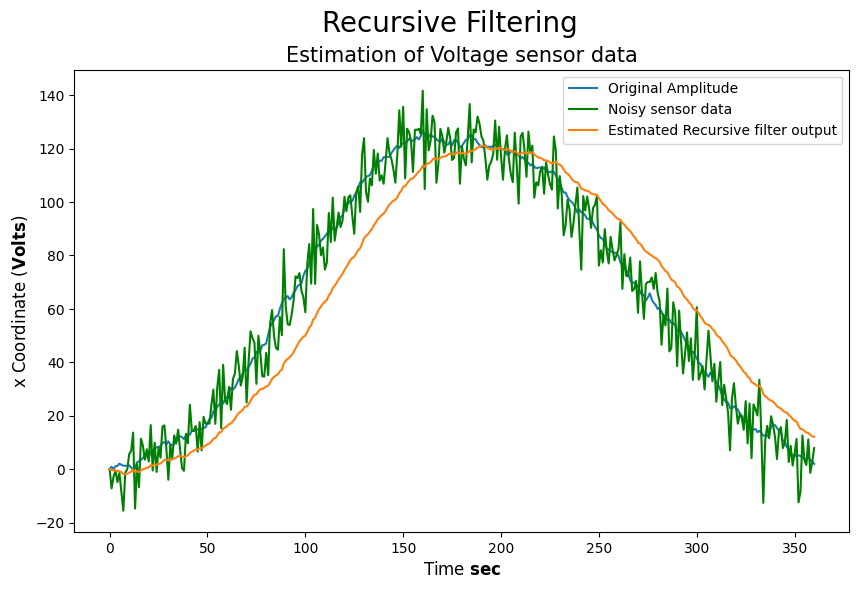

In [4]:
# Creation of Sine wave data

alpha = 0.05            # Recursive filter coefficient
x = np.zeros(N+1)       # Original signal/data
x_hat = np.zeros(N+1)   # Estimated signal/data
z = np.zeros(N+1)       # Measured signal/data

time = np.arange(0, N+1, 1)     # time array

for t in range(0, N):
    x[t+1] = x[t] + np.sin(t *(np.pi/180)) + d1[t]      # Original data (has noise eta)
    z[t+1] = x[t+1] + d2[t]              # Measured data from the sensor (has noise neta)
    x_hat[t+1] = (1 - alpha) * x_hat[t] + alpha * z[t+1] # Recursive filter with alpha = 0.1

# Plot
plt.figure(figsize=(10, 6))
plt.suptitle('Recursive Filtering', fontsize=20)
plt.title('Estimation of Voltage sensor data',fontsize=15)
plt.xlabel(r'Time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'x Coordinate ($\mathbf{Volts}$)',fontsize=12)
plt.plot(time, x, label='Original Amplitude')
plt.plot(time, z, 'g', label='Noisy sensor data')
plt.plot(time, x_hat, label='Estimated Recursive filter output')
plt.legend()
plt.show()

### c) Create 1D Linear Kalman Filter estimation on data

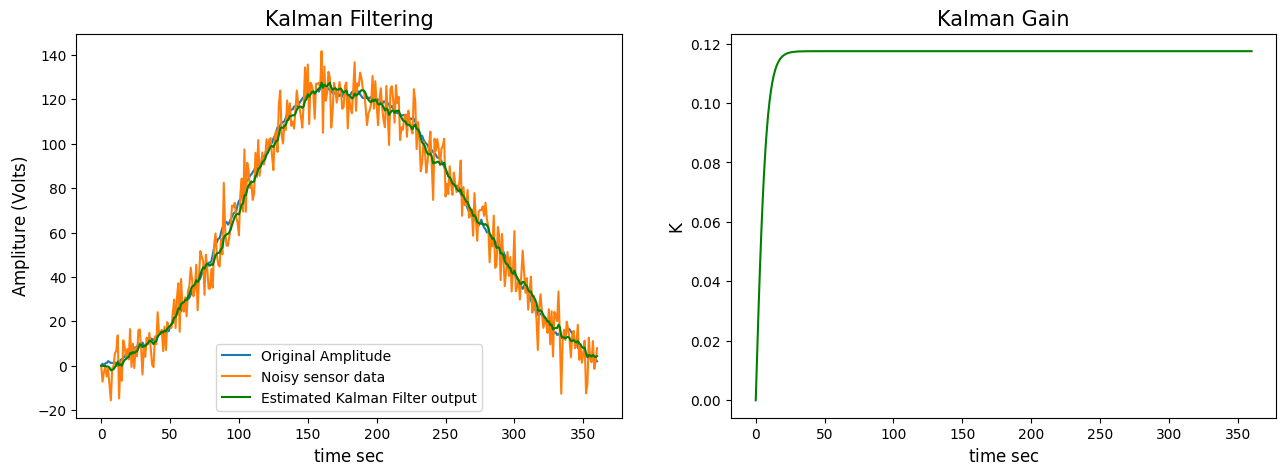

In [5]:
# Linear Kalman Filter

eOpt = np.zeros(N+1)    # Mean square Error
K    = np.zeros(N+1)    # Kalman Coefficient
xOpt = np.zeros(N+1)    # Optimal Filtered x

for t in range(0, N):

    # Mean square Error Equation
    eOpt[t+1] = np.sqrt((sigma_neta**2) * (eOpt[t]**2 + sigma_eta**2)/(eOpt[t]**2 + sigma_eta**2 + sigma_neta**2))

    # Kalman Coefficient Equation
    K[t+1] = (eOpt[t+1]**2)/(sigma_neta**2)

    # Optimal Filtered Values Equation
    xOpt[t+1] = (1-K[t+1]) * (xOpt[t] + np.sin(t*(np.pi/180))) + K[t+1]*z[t+1]


plt.subplot(1,2,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Kalman Filtering',fontsize=15)
plt.xlabel(r'time $\mathrm{sec}$',fontsize=12)
plt.ylabel(r'Ampliture ($\mathrm{Volts}$)',fontsize=12)
plt.plot(time, x, label='Original Amplitude')
plt.plot(time, z, label='Noisy sensor data')
plt.plot(time, xOpt, 'g', label='Estimated Kalman Filter output')
plt.legend()

plt.subplot(1,2,2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Kalman Gain',fontsize=15)
plt.xlabel(r'time $\mathrm{sec}$',fontsize=12)
plt.ylabel('K',fontsize=12)
plt.plot(time, K, 'g', label='Kalman Gain')
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

# Task - 2

### 1. Read the recorded data

In [6]:
df = pd.read_csv("./data-final.csv", low_memory=False)

In [7]:
df

,time,ax,ay,az,Latitude,Longitude,Speed (m/s),Unnamed: 7
0,0.055664,0.0000,0.0000,0.0000,0.000000,0.000000,0.00,NaN
1,0.055847,0.0000,0.0000,0.0000,55.752047,48.743030,0.00,NaN
2,0.073221,0.0000,0.0000,0.0000,55.752047,48.743030,0.00,NaN
3,0.091520,0.0000,0.0000,0.0000,55.752047,48.743030,0.00,NaN
4,0.109364,0.0000,0.0000,0.0000,55.752047,48.743030,0.00,NaN
...,...,...,...,...,...,...,...,...
16310,205.019554,-0.0388,0.5277,-1.2835,55.749824,48.743379,1.45,NaN
16311,205.039519,-0.0388,0.5277,-1.2835,55.749824,48.743379,1.45,NaN
16312,205.040419,-0.0388,0.5277,-1.2835,55.749824,48.743379,1.45,NaN
16313,205.060150,-0.0388,0.5277,-1.2835,55.749824,48.743379,1.45,NaN


### 2. Initialize the Variables from the dataframe

In [8]:
time = np.array(df.time)
ax = np.array(df.ax)
ay = np.array(df.ay)
az = np.array(df.az)
v = np.array(df['Speed (m/s)'])
dt_time = df.time.diff()

### 3. Plot the accelerations

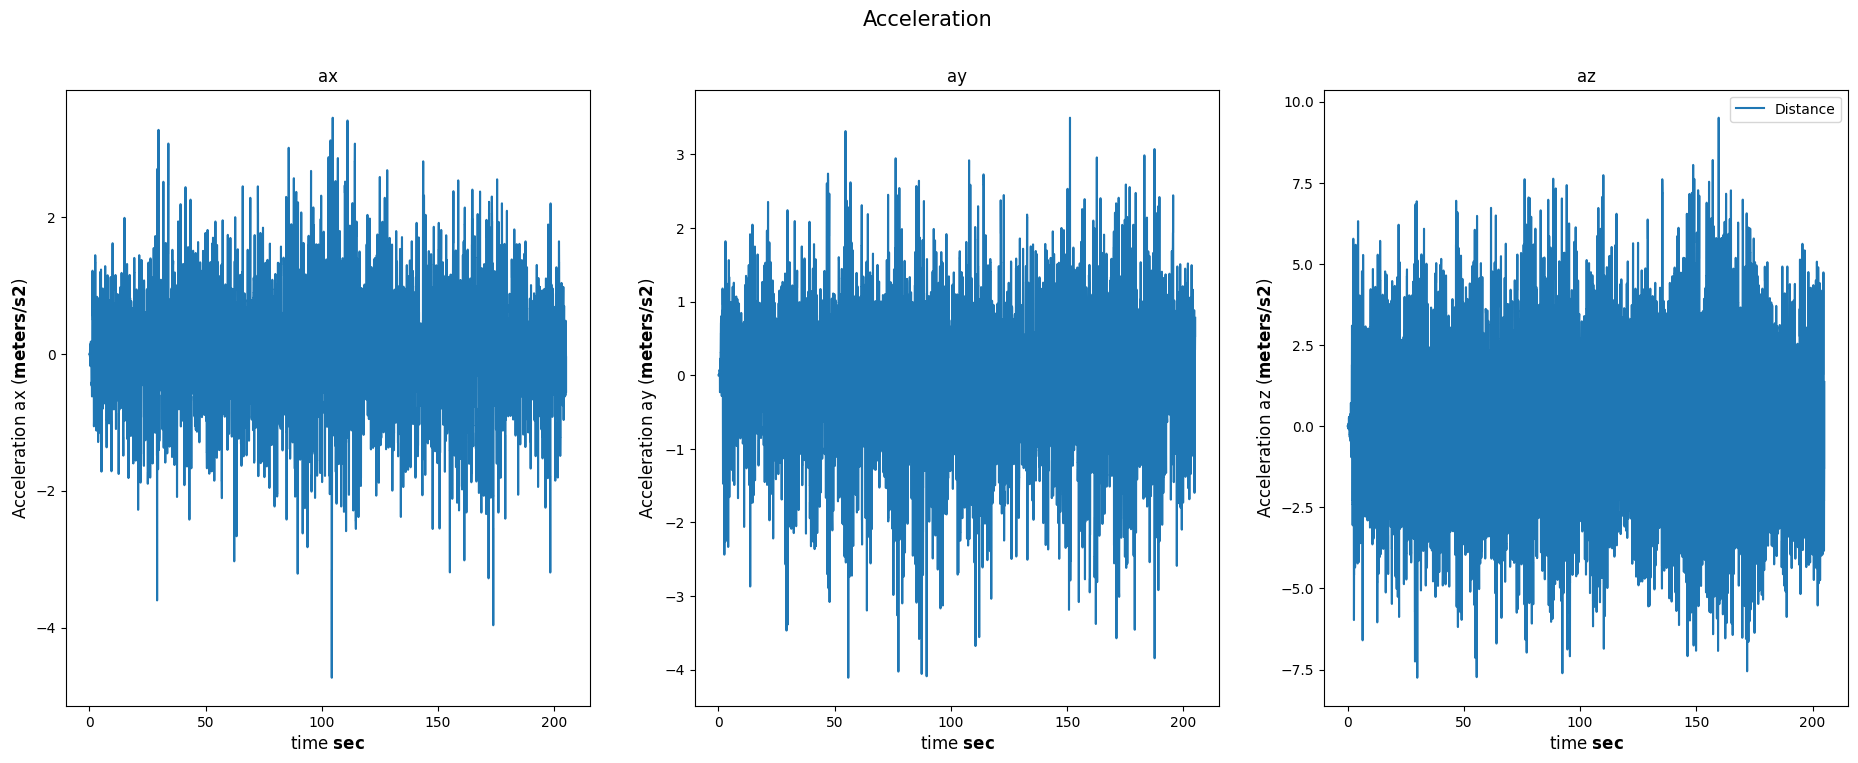

In [9]:
# Plot Acceleration

plt.figure(figsize=(23, 8))
plt.subplot(131)
plt.suptitle('Acceleration',fontsize=15)
plt.title('ax',fontsize=12)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Acceleration ax ($\mathbf{meters/s2}$)',fontsize=12)
plt.plot(time, ax, label='Distance')

plt.subplot(132)
plt.title('ay',fontsize=12)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Acceleration ay ($\mathbf{meters/s2}$)',fontsize=12)
plt.plot(time, ay, label='Distance')

plt.subplot(133)
plt.title('az',fontsize=12)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Acceleration az ($\mathbf{meters/s2}$)',fontsize=12)
plt.plot(time, az, label='Distance')

plt.legend()
plt.show()

### 4. Get the standard deviations of the acceleration's ax, ay and az

In [10]:
std_ax = statistics.stdev(ax)
std_ay = statistics.stdev(ay)
std_az = statistics.stdev(az)
print("Standard deviation of Acceleration ax is : ", std_ax)
print("Standard deviation of Acceleration ay is : ", std_ay)
print("Standard deviation of Acceleration az is : ", std_az)

Standard deviation of Acceleration ax is :  0.9447077130991733
Standard deviation of Acceleration ay is :  1.099868944454794
Standard deviation of Acceleration az is :  3.1837236622773073


### 5. Calculate the distance travelled

In [11]:
dis_p_add = []
dist = [0]
for i in range(df.shape[0]-2):
    start_pos = (df.Latitude[i+1], df.Longitude[i+1])
    end_pos = (df.Latitude[i+2], df.Longitude[i+2])
    dist.append(distance.distance(start_pos, end_pos).meters)
for i in range(len(dist)):
    dis_p_add.append(sum(dist[:i])+dist[i])

print(f"Original (GPS) Distance travelled : {sum(dist):.4f} meters")

Original (GPS) Distance travelled : 322.4144 meters


### 5. Another way to calculate the

In [12]:
dist = []
dis_p_add = []
x = []
y = []
for i in range(df.shape[0]-2):
    R = 6371e3
    lat1 = df.Latitude[i+1] * np.pi/180
    lat2 = df.Latitude[i+2] * np.pi/180

    lon1 = df.Longitude[i+1] * np.pi/180
    lon2 = df.Longitude[i+2] * np.pi/180

    d_lat = (df.Latitude[i+2]-df.Latitude[i+1]) * np.pi/180
    d_lon = (df.Longitude[i+2]-df.Longitude[i+1]) * np.pi/180

    a = np.sin(d_lat/2) * np.sin(d_lat/2) + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2) * np.sin(d_lon/2)

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a));
    #d.append(R * c) # in metres

    x.append((lon2-lon1) * np.cos((lat1+lat2)/2) * R)
    y.append((lat2-lat1) * R)
    dist.append((np.sqrt(np.multiply(x[i], x[i]) + np.multiply(y[i], y[i]))))

for i in range(len(dist)):
    dis_p_add.append(sum(dist[:i])+dist[i])

print("Original (GPS) Distance travelled : \n", sum(dist))

Original (GPS) Distance travelled : 
 321.76373311061263


### 6. Plot the Original (GPS) distance travelled

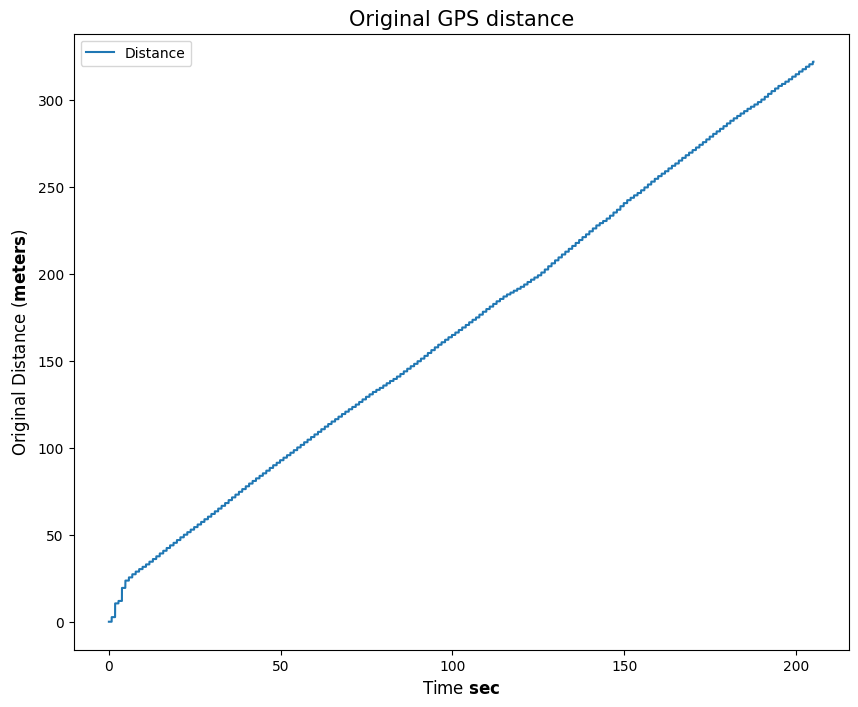

In [13]:
# Plot the Original GPS distance travelled
plt.figure(figsize=(10, 8))
plt.title('Original GPS distance',fontsize=15)
plt.xlabel(r'Time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Original Distance ($\mathbf{meters}$)',fontsize=12)
plt.plot(time[:-2], dis_p_add, label='Distance')

plt.legend()
plt.show()

### 7. Get Distance from Acceleration values ax, ay, az

In [14]:
# Measured values from the accelerometer
ax = np.array(df.ax)
ay = np.array(df.ay)
az = np.array(df.az)
df_time = df.time.diff()
test_x = np.zeros(len(dt_time)+1)
test_y = np.zeros(len(dt_time)+1)
test_z = np.zeros(len(dt_time)+1)
for i in range(len(dt_time)):
    test_x[i+1] = v[i]*dt_time[i] + 0.5*ax[i]*(dt_time[i]**2)
    test_y[i+1] = v[i]*dt_time[i] + 0.5*ay[i]*(dt_time[i]**2)
    test_z[i+1] = v[i]*dt_time[i] + 0.5*az[i]*(dt_time[i]**2)
    if i == 1:
        test_x[1] = 0
        test_y[1] = 0
        test_z[1] = 0

### 8. Prepare the Plot data for x, y, z distances which we get from ax, ay, ax

In [15]:
x_test = []
y_test = []
z_test = []

for i in range(len(test_x)):
    x_test.append(sum(test_x[:i])+test_x[i])

for i in range(len(test_y)):
    y_test.append(sum(test_y[:i])+test_y[i])

for i in range(len(test_z)):
    z_test.append(sum(test_z[:i])+test_z[i])

### 9. Plot the x, y, z distances from ax, ay, az

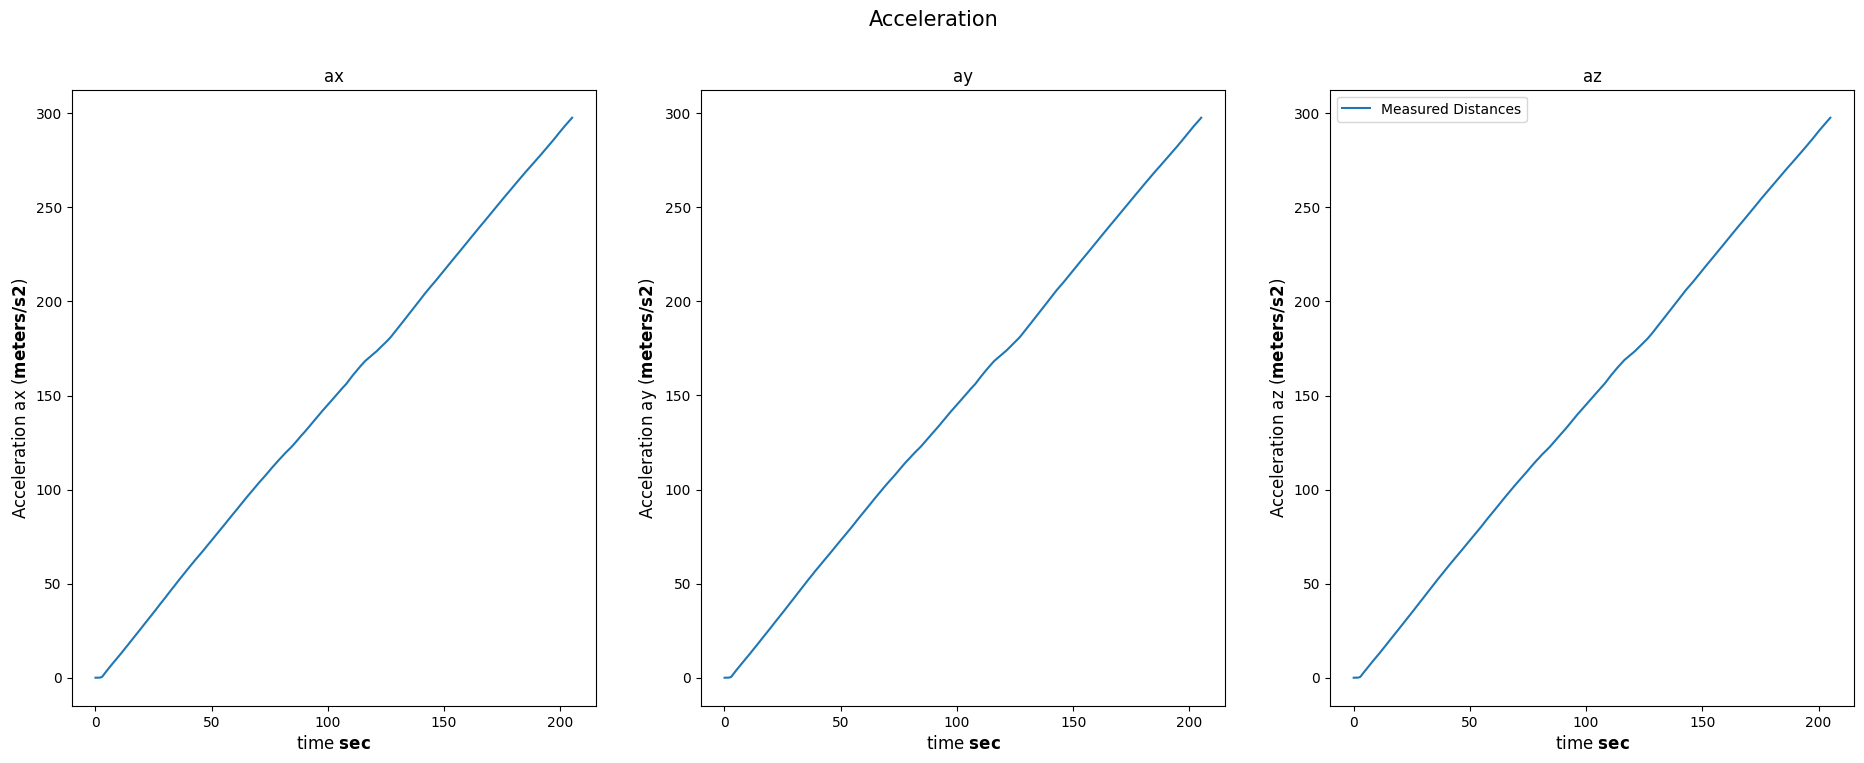

In [16]:
# Plot Acceleration

plt.figure(figsize=(23, 8))
plt.subplot(131)
plt.suptitle('Acceleration',fontsize=15)
plt.title('ax',fontsize=12)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Acceleration ax ($\mathbf{meters/s2}$)',fontsize=12)
plt.plot(time, x_test[:-1], label='Distance')

plt.subplot(132)
plt.title('ay',fontsize=12)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Acceleration ay ($\mathbf{meters/s2}$)',fontsize=12)
plt.plot(time, y_test[:-1], label='Distance')

plt.subplot(133)
plt.title('az',fontsize=12)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Acceleration az ($\mathbf{meters/s2}$)',fontsize=12)
plt.plot(time, z_test[:-1], label='Measured Distances')

plt.legend()
plt.show()

### 10. Calculate the Measured (Accelerometer) Distance from x, y, z

In [17]:
x1 = np.array(test_x)**2
y1 = np.array(test_y)**2
z1 = np.array(test_z)**2

x_final_plot = []
x_final = np.sqrt(x1, y1)
for i in range(len(x_final)):
    x_final_plot.append(sum(x_final[:i])+x_final[i])

In [18]:
print("Measured (Accelerometer) Distance : ", sum(x_final))

Measured (Accelerometer) Distance :  297.6987128636507


### 11. Plot the Measured (Accelerometer) distance travelled

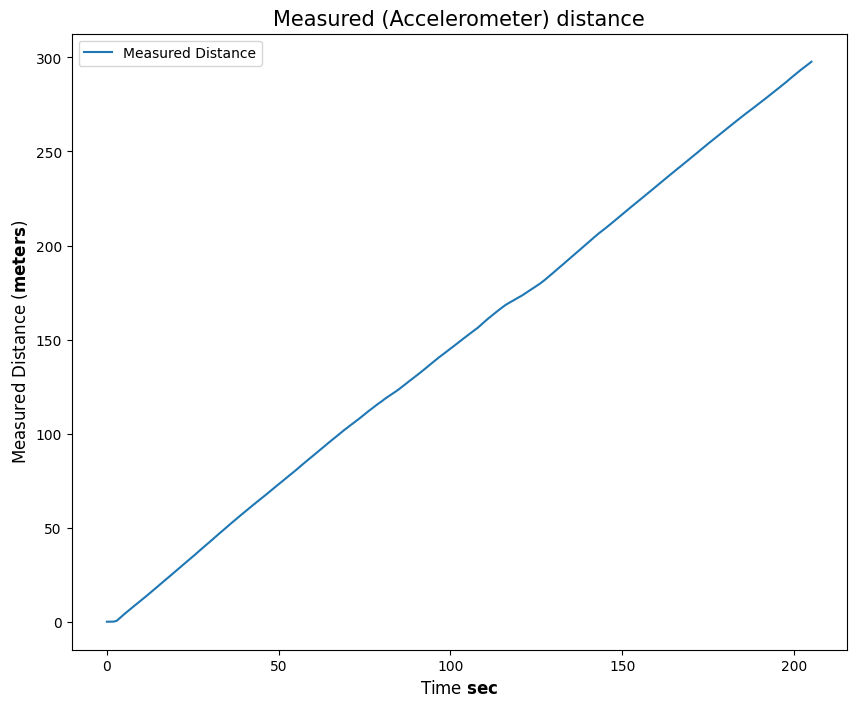

In [19]:
# Plot the Measured (Accelerometer) distance travelled
plt.figure(figsize=(10, 8))
plt.title('Measured (Accelerometer) distance',fontsize=15)
plt.xlabel(r'Time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'Measured Distance ($\mathbf{meters}$)',fontsize=12)
plt.plot(time, x_final_plot[:-1], label='Measured Distance')

plt.legend()
plt.show()

### 12. Calculate the standard deviation of Measured (Accelerometer) data

In [20]:
sigma_neta = statistics.stdev(x_final)
print("Standard Deviation of Measured data : ", sigma_neta)

Standard Deviation of Measured data :  0.0129041171706736


### 13. Calculate the standard deviation of Original (GPS) data

In [21]:
sigma_eta = statistics.stdev(dist)
print("Standard Deviation of Original GPS data : ", sigma_eta)

Standard Deviation of Original GPS data :  0.189740838142325


### 14. Recursive filter to check how it works

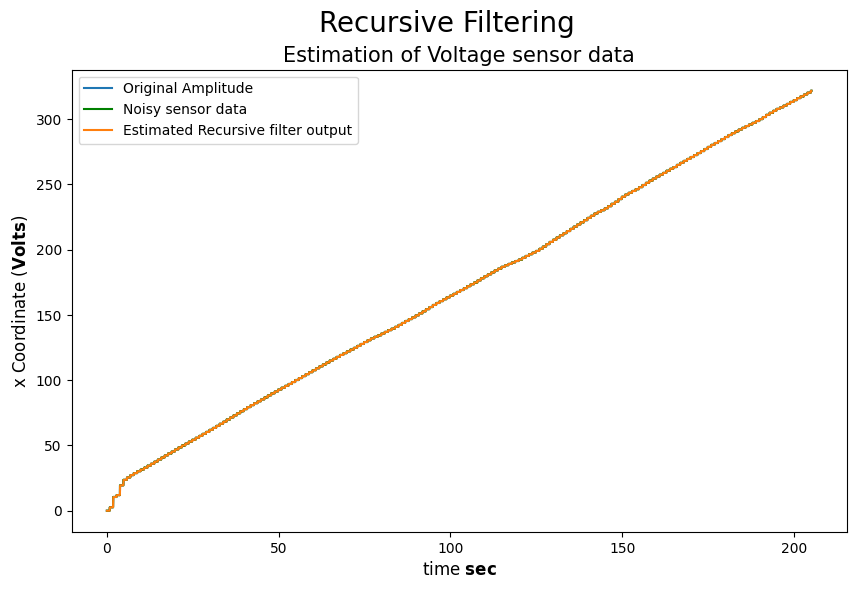

In [22]:
# First we make a recursive filter

N = len(time) -2
a = 0.1                 # acceleration # it should be velocity not acceleration
alpha = 0.5             # Recursive filter coefficient
x = np.zeros(N+1)       # Original signal/data
x_hat = np.zeros(N+1)   # Estimated signal/data
z = np.zeros(N+1)       # Measured signal/data

for t in range(0, N):
    x[t+1] = x[t] + dist[t] #+ d1[t]      # Original data (has noise eta)
    z[t+1] = x[t+1] + x_final[t+1]  #+ d2[t] # Measured data from the sensor (has noise neta)
    x_hat[t+1] = (1 - alpha) * x_hat[t] + alpha * z[t+1]    # Recursive filter with alpha = 0.1

# Plot
plt.figure(figsize=(10, 6))
plt.suptitle('Recursive Filtering', fontsize=20)
plt.title('Estimation of Voltage sensor data',fontsize=15)
plt.xlabel(r'time $\mathbf{sec}$',fontsize=12)
plt.ylabel(r'x Coordinate ($\mathbf{Volts}$)',fontsize=12)
plt.plot(time[:-1], x, label='Original Amplitude')
plt.plot(time[:-1], z, 'g', label='Noisy sensor data')
plt.plot(time[:-1], x_hat, label='Estimated Recursive filter output')
plt.legend()
plt.show()

### 15. 1-D Kalman Filter to estimate the distance travelled

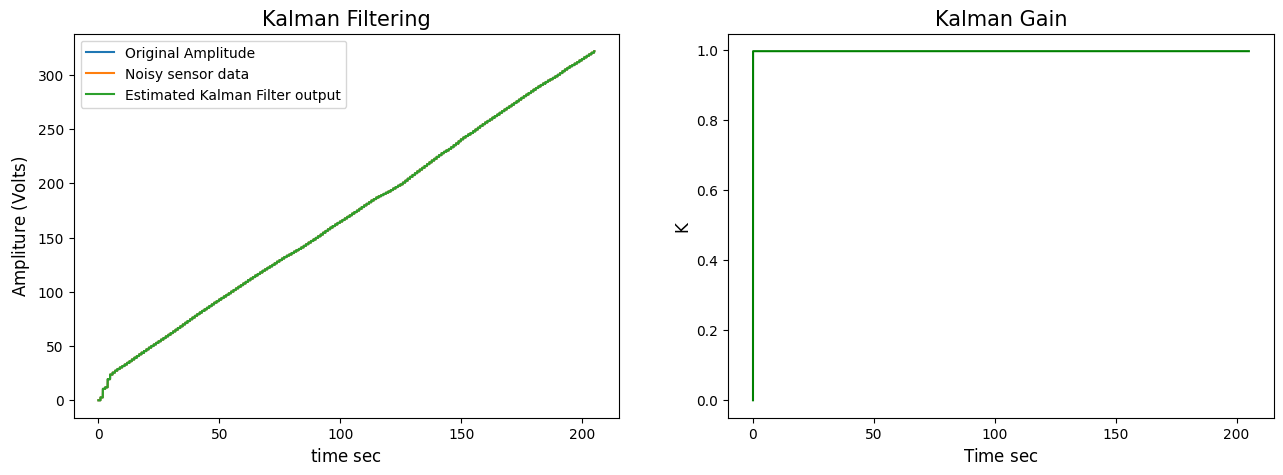

In [23]:
# Linear Kalman Filter

eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)

for t in range(0, N):
    eOpt[t+1] = np.sqrt((sigma_neta**2) * (eOpt[t]**2 + sigma_eta**2)/(eOpt[t]**2 + sigma_eta**2 + sigma_neta**2))
    K[t+1] = (eOpt[t+1]**2)/(sigma_neta**2)
    xOpt[t+1] = (1-K[t+1]) * (xOpt[t] + dist[t]) + K[t+1]*z[t+1]


plt.subplot(1,2,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Kalman Filtering',fontsize=15)
plt.xlabel(r'time $\mathrm{sec}$',fontsize=12)
plt.ylabel(r'Ampliture ($\mathrm{Volts}$)',fontsize=12)
plt.plot(time[:-1], x, label='Original Amplitude')
plt.plot(time[:-1], z, label='Noisy sensor data')
plt.plot(time[:-1], xOpt, label='Estimated Kalman Filter output')
plt.legend()

plt.subplot(1,2,2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Kalman Gain',fontsize=15)
plt.xlabel(r'Time $\mathrm{sec}$',fontsize=12)
plt.ylabel('K',fontsize=12)
plt.plot(time[:-1], K, 'g', label='Kalman Gain')
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

### Conclusion:
#### As we can see that the noise is very less from the accelerometer sensor of my mobile.
#### That is why the Kalman Filter has almost exactly converged with the original data